### Problem Statement
Given a set of images containing real-world objects, it is fairly easy for humans to recognize them. Our task 
here is to build a multiclass (10 classes or categories) image classifier that can identify the correct class label 
of a given image. For this task, we will be utilizing the CIFAR10 dataset.

### CNN 
The following are the key concepts of CNN:
- Convolutional Layer: This is the key differentiating component of a CNN as 
compared to other neural networks. Convolutional layer or conv layer is a set of 
learnable filters. These filters help capture spatial features. These are usually small 
(along the width and height) but cover the full depth (color range) of the image. 
During the forward pass, we slide the filter across the width and the height of the 
image while computing the dot product between the filter attributes and the input at 
any position. The output is a two-dimensional activation map from each filter, which 
are then stacked to get the final output.
- Pooling Layer: These are basically down-sampling layers used to reduce spatial 
size and number of parameters. These layers also help in controlling overfitting. 
Pooling layers are inserted in between conv layers. Pooling layers can perform down 
sampling using functions such as max, average, L2-norm, and so on.
- Fully Connected Layer: Also known as FC layer. These are similar to fully connected 
layers in general neural networks. These have full connections to all neurons in the 
previous layer. This layer helps perform the tasks of classification.
- Parameter Sharing: The unique thing about CNNs apart from the conv layer 
is parameter sharing. Conv layers use same set of weights across the filters thus 
reducing the overall number of parameters required.

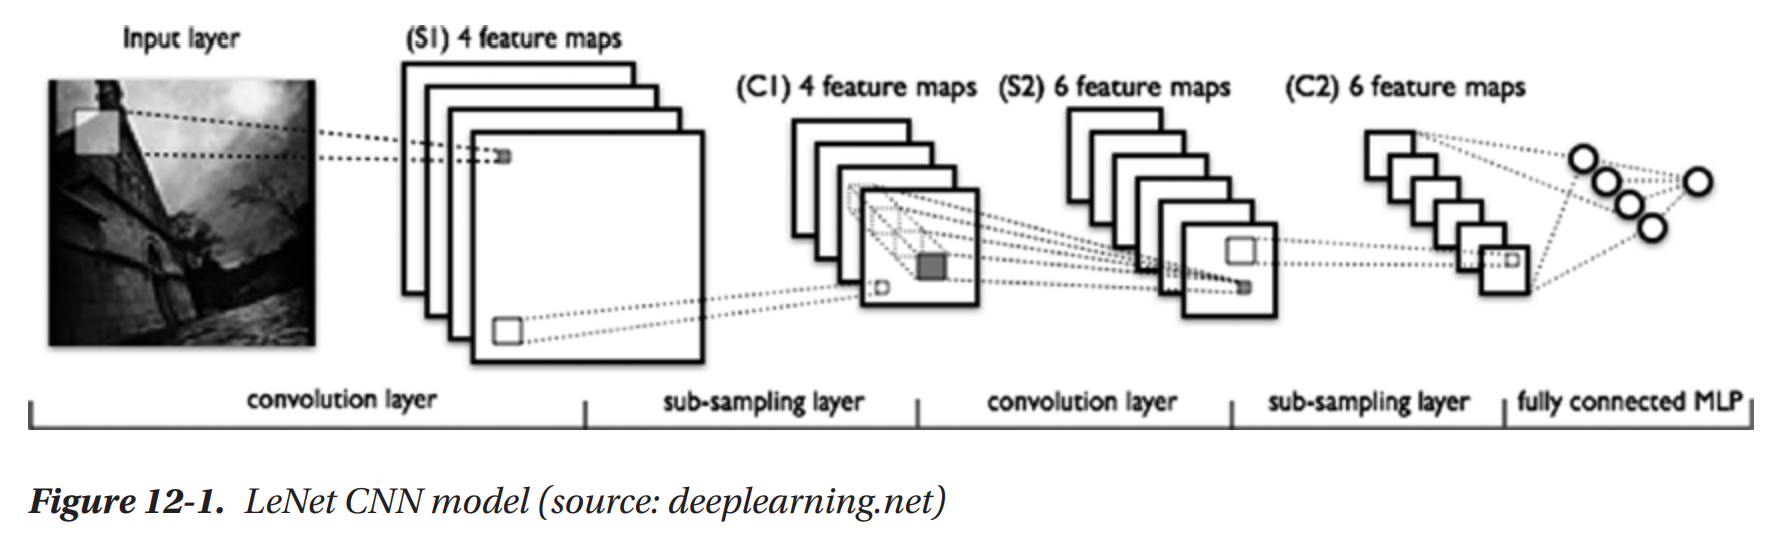

For more details on CNN refer to link below:
 http://cs231n.github.io/convolutional-networks.
 
 
### Dataset
The CIFAR10 dataset is a collection of tiny labeled images spanning across 10 different classes. 
The dataset was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton and is available at 
https://www.cs.toronto.edu/~kriz/cifar.html as well as through the datasets module in keras.
This dataset contains tiny images of size 32 x 32 with 50,000 training and 10,000 test samples. Each 
image can fall into one and only one of the following classes.
-	 Automobile
-	 Airplane
-	 Bird
-	 Cat
-	 Deer
-	 Dog
-	 Frog
-	 Horse
-	 Ship
-	 Truck

Each class is mutually exclusive

# CIFAR10 Classifier

This notebook prepares an CIFAR10 classifier using a Convolutional Neural Network (CNN)

In [1]:
!pip3 install pydot
!pip3 install pydot-ng
!sudo apt-get install graphviz 
!pip3 install pydotplus

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
The following packages were automatically installed and are no longer required:
  bridge-utils ubuntu-fan
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.


In [2]:
# import required libs
import keras
import numpy as np
from keras import backend as K
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import preprocess_input, decode_predictions

import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

%matplotlib inline

Set Parameters

In [3]:
batch_size = 128
num_classes = 10
epochs = 20
input_shape = (32, 32, 3)


## Get CIFAR Dataset
get the dataset and then perform one hot encoding of the labels

In [4]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Dataset Details

In [5]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [6]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Build a CNN based deep neural network

It starts off with a convolutional layer with a total of 32 3 x 3 filters and activation function as the 
rectified linear unit (relu). The input shape resembles each image size, i.e. 32 x 32 x 3 (color image has three 
channels—RGB). This is followed by another convolutional layer and a max-pooling layer. Finally, we have 
the fully connected dense layer. Since we have 10 classes to choose from, the final output layer has a softmax
activation

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

## Visualize the network architecture

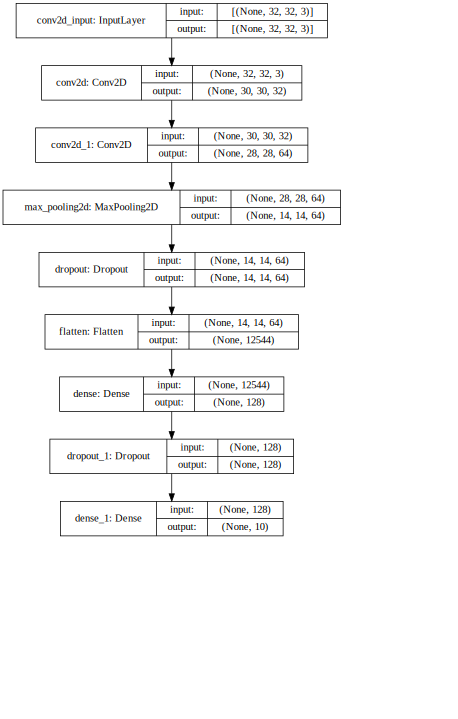

In [8]:
from IPython.display import SVG
import pydot
import keras.utils.vis_utils
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, 
                 show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

## Compile the model

We use categorical_crossentropy as our loss function since we are 
dealing with multiple classes. Besides this, we use the Adadelta optimizer and then train the classifier on the 
training data.

In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

## Train the classifier

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

model.get_params()

Epoch 1/20
391/391 [==============================] - 33s 84ms/step - loss: 49.4897 - accuracy: 0.1029
Epoch 2/20
391/391 [==============================] - 41s 105ms/step - loss: 13.7723 - accuracy: 0.1087
Epoch 3/20
391/391 [==============================] - 58s 148ms/step - loss: 3.6951 - accuracy: 0.1104
Epoch 4/20
391/391 [==============================] - 49s 125ms/step - loss: 2.6247 - accuracy: 0.1089
Epoch 5/20
391/391 [==============================] - 53s 135ms/step - loss: 2.4493 - accuracy: 0.1029
Epoch 6/20
391/391 [==============================] - 51s 132ms/step - loss: 2.3911 - accuracy: 0.1035
Epoch 7/20
391/391 [==============================] - 50s 127ms/step - loss: 2.3725 - accuracy: 0.1012
Epoch 8/20
391/391 [==============================] - 53s 134ms/step - loss: 2.3501 - accuracy: 0.1005
Epoch 9/20
391/391 [==============================] - 49s 125ms/step - loss: 2.3450 - accuracy: 0.1047
Epoch 10/20
391/391 [==============================] - 50s 129ms/step - 

## Predict and test model performance

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)

In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# How CNN Classifies an Image? 

Prepare image for CNN

In [ ]:
img_idx = 999

In [ ]:
plt.imshow(x_test[img_idx],aspect='auto')

Image Label

In [ ]:
y_test[img_idx]

Predict the label

In [ ]:
test_image =np.expand_dims(x_test[img_idx], axis=0)
test_image.shape

In [ ]:
model.predict_classes(test_image,batch_size=1)

In [ ]:
model.predict_proba(test_image,batch_size=1)

## Utility Methods to understand CNN
+ source: https://github.com/fchollet/keras/issues/431
+ source: https://github.com/philipperemy/keras-visualize-activations/blob/master/read_activations.py

In [ ]:
# https://github.com/fchollet/keras/issues/431
def get_activations(model, model_inputs, print_shape_only=True, layer_name=None):
    import keras.backend as K
    print('----- activations -----')
    activations = []
    inp = model.input

    model_multi_inputs_cond = True
    if not isinstance(inp, list):
        # only one input! let's wrap it in a list.
        inp = [inp]
        model_multi_inputs_cond = False

    outputs = [layer.output for layer in model.layers if
               layer.name == layer_name or layer_name is None]  # all layer outputs

    funcs = [K.function(inp + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

    if model_multi_inputs_cond:
        list_inputs = []
        list_inputs.extend(model_inputs)
        list_inputs.append(1.)
    else:
        list_inputs = [model_inputs, 1.]

    # Learning phase. 1 = Test mode (no dropout or batch normalization)
    # layer_outputs = [func([model_inputs, 1.])[0] for func in funcs]
    layer_outputs = [func(list_inputs)[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if print_shape_only:
            print(layer_activations.shape)
        else:
            print(layer_activations)
    return activations

In [ ]:
# https://github.com/philipperemy/keras-visualize-activations/blob/master/read_activations.py
def display_activations(activation_maps):
    import numpy as np
    import matplotlib.pyplot as plt
    """
    (1, 26, 26, 32)
    (1, 24, 24, 64)
    (1, 12, 12, 64)
    (1, 12, 12, 64)
    (1, 9216)
    (1, 128)
    (1, 128)
    (1, 10)
    """
    batch_size = activation_maps[0].shape[0]
    assert batch_size == 1, 'One image at a time to visualize.'
    for i, activation_map in enumerate(activation_maps):
        print('Displaying activation map {}'.format(i))
        shape = activation_map.shape
        if len(shape) == 4:
            activations = np.hstack(np.transpose(activation_map[0], (2, 0, 1)))
        elif len(shape) == 2:
            # try to make it square as much as possible. we can skip some activations.
            activations = activation_map[0]
            num_activations = len(activations)
            if num_activations > 1024:  # too hard to display it on the screen.
                square_param = int(np.floor(np.sqrt(num_activations)))
                activations = activations[0: square_param * square_param]
                activations = np.reshape(activations, (square_param, square_param))
            else:
                activations = np.expand_dims(activations, axis=0)
        else:
            raise Exception('len(shape) = 3 has not been implemented.')
        #plt.imshow(activations, interpolation='None', cmap='binary')
        fig, ax = plt.subplots(figsize=(18, 12))
        ax.imshow(activations, interpolation='None', cmap='binary')
        plt.show()

In [ ]:
activations = get_activations(model, test_image)

In [ ]:
display_activations(activations)